## 생성적 적대 신경망 (Generative Adversarial Networks, GAN)
- 딥러닝의 원리를 활용해 가상 이미지를 생성하는 알고리즘
- 예 : 얼굴을 만든다면, 이미지 픽셀들이 어떻게 조하되어야 우리가 생각하는 '얼굴'의 형상이 되는지 딥러닝 알고리즘이 예측한 결과가 앞에 나온 이미지
- Adversarial( = 서로 대립 관계에 있는) : 진짜 같은 가짜를 만들기 위해 '적대적'결합을 진행한다
- 진짜같은 위조지폐를 만들기 위해 애쓰는 위조지폐범과 이를 가려내가 위해 노력하는 경찰 사이의 경합이 결국 더 정교한 위조지폐를 만든다. 이와 같은 경합과정을 이용하는 것이 GAN의 원리
    - 가짜를 만들어내는 파트 '생성자 (Generator)', 진위를 가려내는 파트 '판별자 (Discriminator)'
- 이러한 기본 구조 위에 여러 아이디어를 더한 GAN의 변형 알고리즌들이 계속해서 발표되고 있다.
- 그 중 하나는 DCGAN (Deep Convolutional GAN) 

### 1. 생성자 (Generator) 
: 가상의 이미지를 만들어내는 공장
- 처음에는 랜덤한 픽셀 값으로 채워진 가짜 이미지로 시작해서 판별자의 판별 결과에 따라 지속적으로 업데이트하며 점차 원하는 이미지를 만들어간다.
- DCGAN은 생성자가 가짜이미지를 만들 때, CNN(Convolutional Neural Network)을 이용
    - 앞서 사용한 CNN과 다른 점은 optimizer를 사용하여 최적화하는 과정이나 컴파일 하는 과정이 없다는 것. ==> 판별과 학습이 이곳 생성자에서 일어나는 것이 아니기 때문
- 일부 매개변수를 삭제하는 풀링(Pooling)과정이 없는 대신 패딩(Padding)과정이 포함. ==> 입력 크기와 출력 크기를 똑같이 맞추기 위해.
    - 커널을 이용하여 컨볼루션 층을 만들 때 이미지의 크기가 처음보다 줄어든다는 것을 생각해보면 왜 패딩 과정이 필요한지 알 수 있음
    - 패딩 과정을 통해 생성자가 만들어내는 이미지가 판별자가 비교할 '진짜'와 똑같은 크기가 되게 한다.
    - ```padding = 'same'``` 이라는 설정을 통해 입출력의 크기가 다를 때 자동으로 크기를 확장해 주고 빈 공간에 0을 채워 넣을 수 있음

    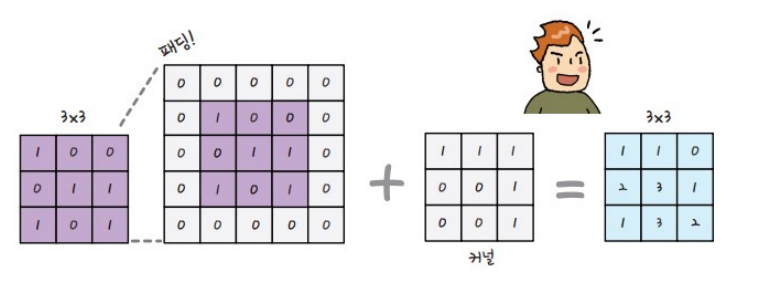

- 학습에 꼭 필요한 옵션 : 배치 정규화 (Batch Normalisation)
    - 입력 데이터릐 평균이 0, 분산이 1이 되도록 재배치
    - 다음 층으로 입력될 값을 이렁하게 재배치하는 역할 ==> 층의 개수가 늘어나도 안정적인 학습을 진행할 수 있다
    - 케라스에서 ```BatchNormalization()``` 함수를 제공
- 생성자의 활성화 함수로는 ReLU를 쓰로 판별자로 넘겨주기 직전에는 tanh함수를 쓴다.
    - tanh함수를 쓰면 출력 값을 -1 ~ 1 사이로 맞출 수 있다.
    - 판별자에 입력될 MNIST 손글씨의 픽셀 번위도 -1 ~ 1로 맞추면 판별 조건이 갖추어짐.

##### ==> 지금까지 설명한 내용을 코드로 정리하면

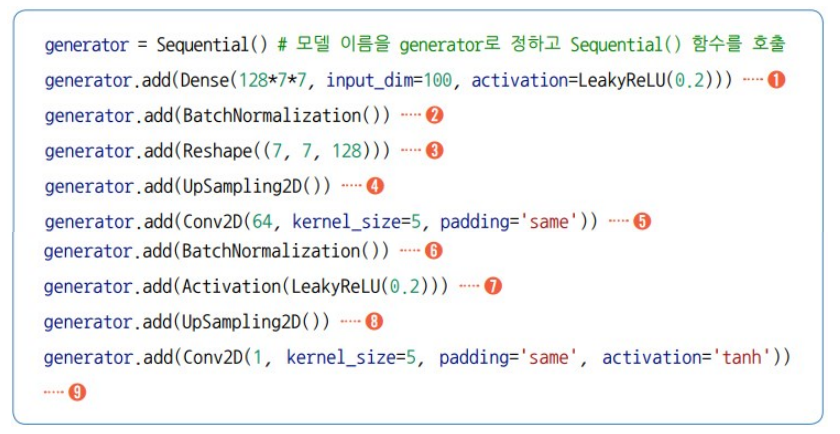

- 128은 임의의 노드 수
- input_dim = 100은 100차원 크기의 랜덤 벡터 (100이 아니어도 좋다)
- 주의할 부분 : 7 X 7 ==> MNIST 손글씨의 이미지는 28 X 28인데 7 X 7이 들어간다. ==> 이 후 UpSampling2D 함수를 두번 쓰는데 여기에서 이미지의 가로세로 크기가 2배가 된다. 즉 7 X 7 --> 14 X 14 --> 28 X 28가 된다.

- ==> *이렇게 작은 크기의 이미지를 점점 늘려가면서 컨볼루션 층을 지나게 하는 것이 DCGAN의 특징*

- 케라스는 UpSampling과 Conv2D를 합쳐놓은  ```Conv2DTranspose()``` 를 제공.
    - (4,5)와 (8,9)를 없애고 이 함수 하나만 써도 되지만 이해를 돕기위해 나누어 쓰고 설명
- (1,7)에서 활성화 함수로 LeakyReLU를 썼다.
    - 기존 ReLU함수를 쓸 경우 학습이 불안정해지는 경우가 많아 ReLu를 조금 변형한 LeakyReLU를 사용

    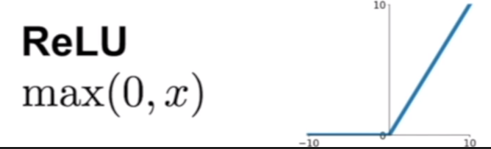
    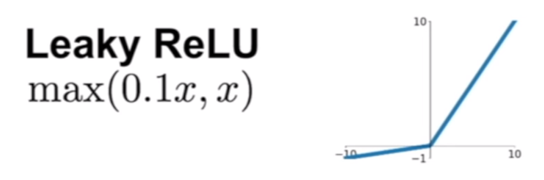

    - LeakyReLU 함수는 ReLU 함수에서 x값이 음수이면 무조건 0이 되어 뉴런들이 일찍 소실되는 단점을 보완하기 위해, 0 이하에서도 작은 값을 갖게 만드는 활성화 함수
    - ```LeakyReLU(0.2)``` ==> 0보다 작을 경우 0.2
- (2,6)에서는 배치 정규화가 진행된다
- 9에서 한번더 컨볼루션 과정을 거친 후 판별자로 값을 넘길 준비를 마친다

### 2. 판별자 (Discriminator)
: 생성자에서 넘어온 이미지가 가짜인지 진짜 인지를 판별해주는 장치
- 컨볼루션 신경망의 구조를 그대로 사용
    - 컨볼루션 신경망이 원래 무언가를 구별하는데 최적화된 알고리즘이기 때문에 그 목적 그대로 사용하면 된다
- 진짜(1) 아니면 가짜(0), 둘 중 하나를 결정하는 문제이므로 컴파일 부분에서 binary_crossentropy를 사용.
- 드롭아웃, 배치 정규화, 패딩도 사용한다
- 주의할 점 : 판별자는 가짜인지 진짜인지를 판별할 뿐, 자기자신이 학습해서는 안 된다.
    - 판별자가 얻은 가중치는 판별자 자신이 학습하는데 쓰이는 것이 아니라 *생성자*로 넘겨주어 생성자가 업데이트된 이미지를 만들도록 해야한다.
    - ==> 판별자를 만들 때는 가중치를 저장하는 학습기능을 꺼줘야한다.

##### ==> 지금까지 설명한 내용을 코드로 정리하면

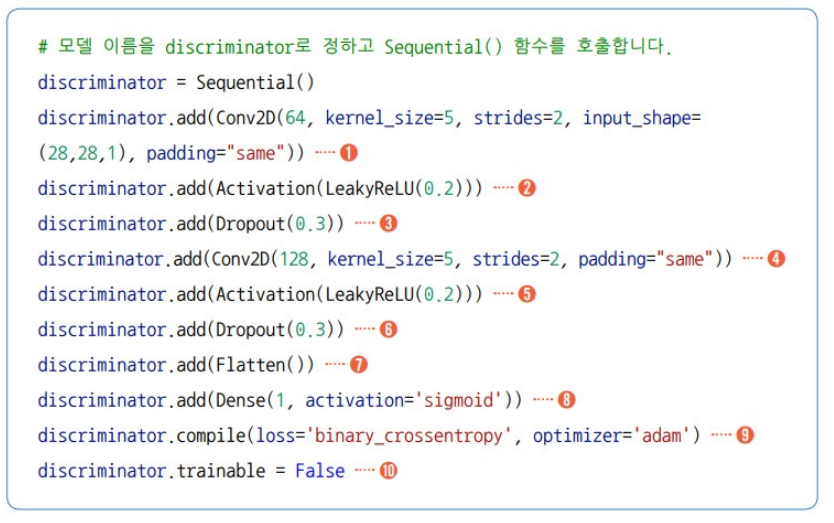

- (1,4)에서 노드를 각각 64개, 128개를 정했고, strides옵션이 처음 등장
    - strides는 커널 윈도우를 몇 칸씩 이동시킬지 정하는 옵션. strides = 2라고 설정했다는 것은 커너 윈도는 두칸씩 움직임.
    - 특별한 설정이 없으면 1
    - 커널윈도를 여러 칸 움직이게 하는 이유는?
        - 가로세로 크기가 더 줄어들어 새로운 특징을 뽑아주는 효과가 생기기 때문
        - 드롭아웃이나 풀링처럼 새로운 필터를 적용한 효과가 생긴다.
    - 생성자에서는 출력 수는 28로 맞추어야했기 때문에 오히려 업샘플링을 통해 가로세로의 수를 늘려주었지만 판별자는 진짜/가짜 구분만 하면 되기 떄문에 그럴 필요가 없다
    -  strides나 드롭아웃(3,6)등 차원을 줄여주는 기능을 적극적으로 사용하면서 컨볼루션 신경망 본래의 목적을 달성

    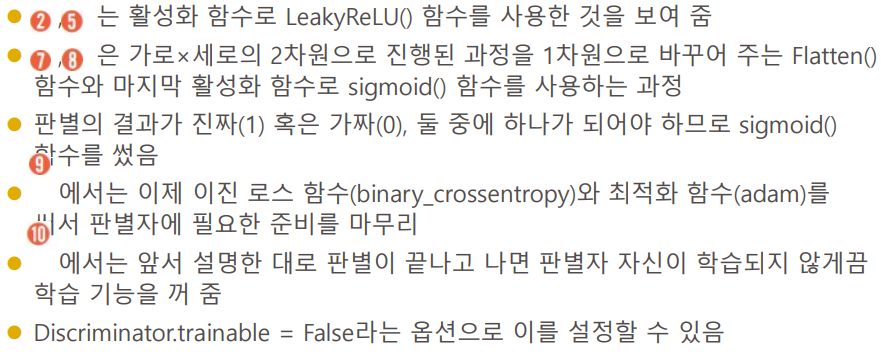

### 3. 적대적 신경망 실행하기
: 생성자와 판별자를 연결시키고 학습을 진행하며 기타 여러 가지 옵션을 설정하는 순서
- 생성자와 판별자를 연결 시킨다는 것 : 생성자에서 나온 출력을 판별자에 넣어 진위여부를 판별하게 만든다.
- 생성자(G)가 만든 G(input)이 실제(x)와 너무 유사해져 판별자(D)가 D(G(input))와 D(x)를 잘 구별하지 못하게 되어 정확도가 0.5에 가까워질때, 비로소 생성자는 자신의 역할을 다하게 되어 학습종료.

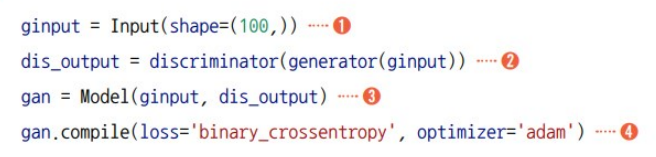

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [3]:
# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [4]:
# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1078146 (4.11 MB)
Trainable params: 852609 (3.25 MB)
Non-trainable params: 225537 (881.00 KB)
_________________________________________________________________


1/1 [==============================] - 0s 67ms/step
epoch:0  d_loss:0.5048  g_loss:0.1725
1/1 [==============================] - 0s 57ms/step
epoch:1  d_loss:0.5367  g_loss:0.0623
1/1 [==============================] - 0s 85ms/step
epoch:2  d_loss:0.5811  g_loss:0.0674
1/1 [==============================] - 0s 64ms/step
epoch:3  d_loss:0.5481  g_loss:0.1825
1/1 [==============================] - 0s 85ms/step
epoch:4  d_loss:0.4810  g_loss:0.4168
1/1 [==============================] - 0s 81ms/step
epoch:5  d_loss:0.4603  g_loss:0.6993
1/1 [==============================] - 0s 58ms/step
epoch:6  d_loss:0.4433  g_loss:0.9345
1/1 [==============================] - 0s 62ms/step
epoch:7  d_loss:0.4498  g_loss:1.0172
1/1 [==============================] - 0s 64ms/step
epoch:8  d_loss:0.4679  g_loss:1.0291
1/1 [==============================] - 0s 71ms/step
epoch:9  d_loss:0.5331  g_loss:0.8842
1/1 [==============================] - 0s 60ms/step
epoch:10  d_loss:0.5573  g_loss:0.7399
1/1 [====

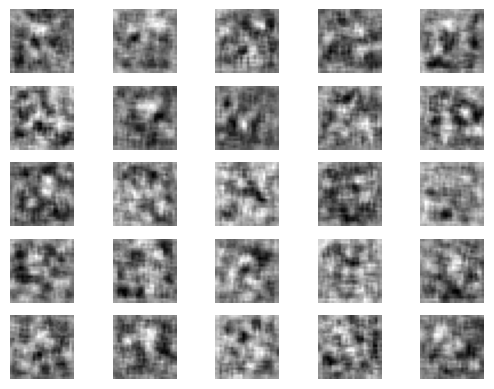

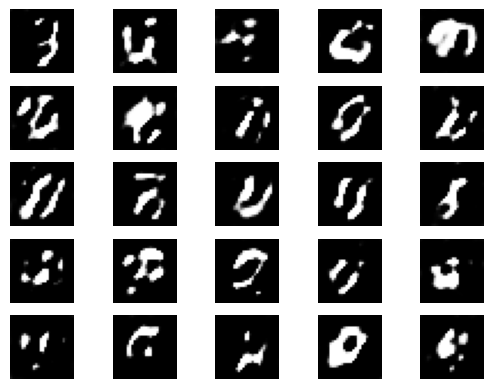

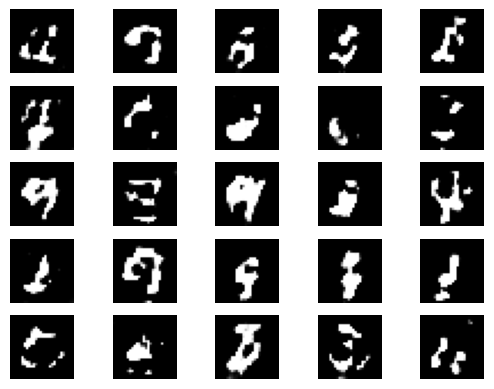

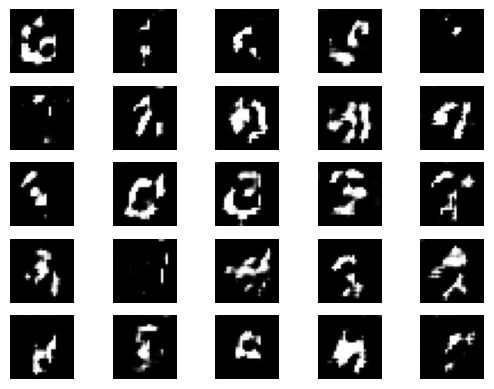

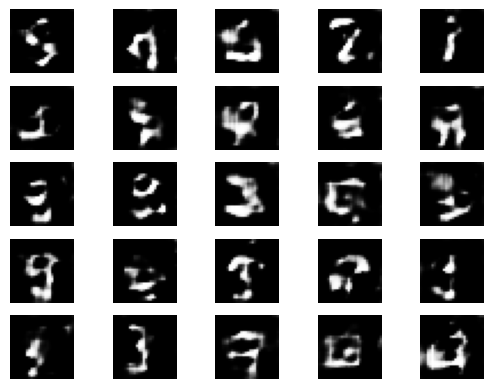

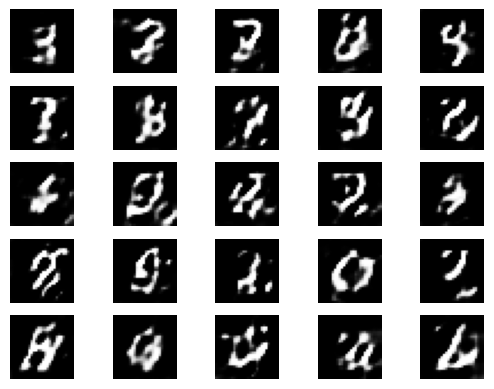

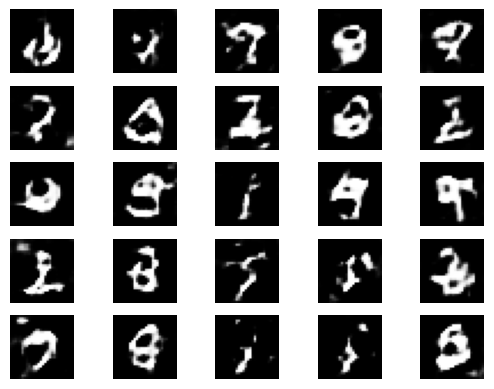

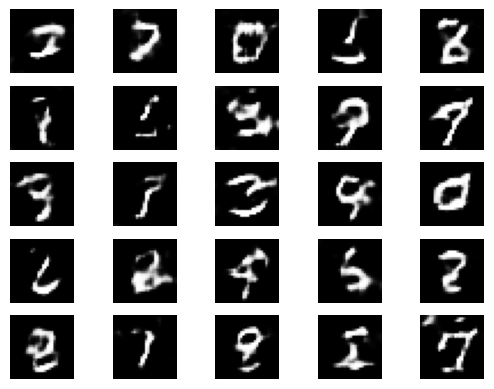

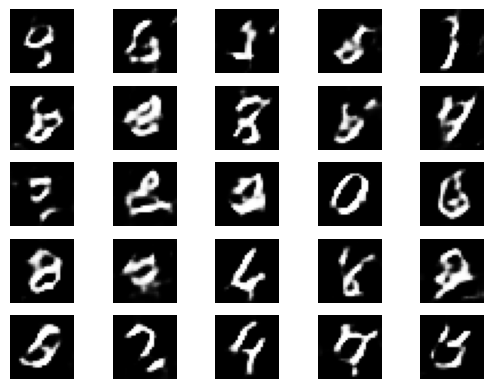

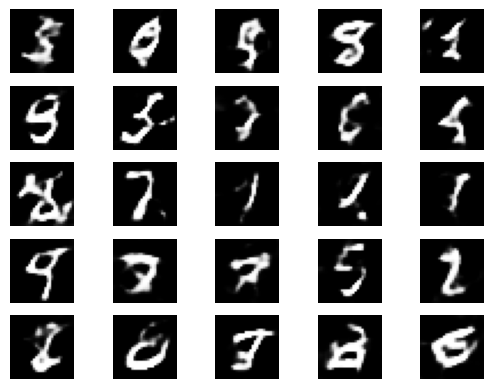

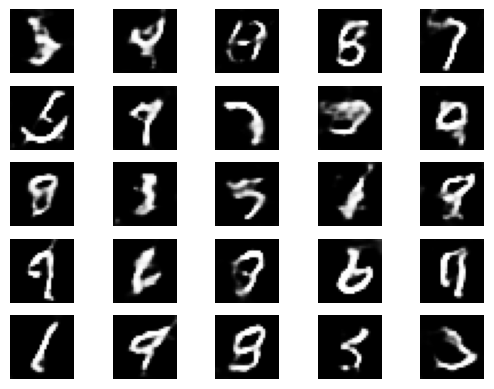

In [6]:
# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 
                                            # 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 
                                       # 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 이 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("../data/GAN_image/gan_mnist_%d.png" % i)

gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장되게 하였습니다.


***

### 오토인코더
: GAN과 비슷한 결과를 만들지만 다른 성지을 지니고 있음
- GAN이 세상에서 존재하지 않는 완전한 가상의 것(진짜 같아보여도 실제로는 존재하지 않는 완전한 가상 이미지)을 만들어내는 반면, 오토인코더는 입력데이터의 특징을 효율적으로 담아낸 이미지(초점이 좀 흐릿하고 윤곽이 불명확하지만 사람의 특징을 유추할 수 있는 것들이 모여 이미지를 생성)를 만들어낸다.

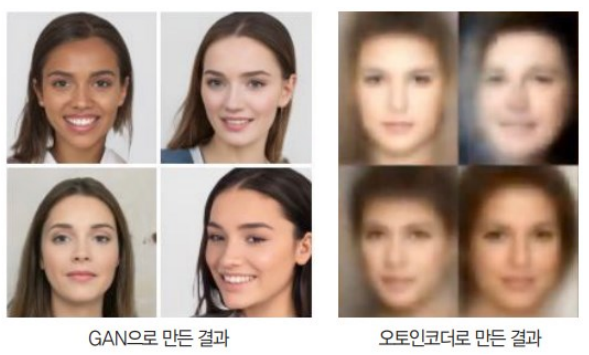

- 활용 : 영상 의학분야등 아직 데이터 수가 충분하지 않은 분야에 사용될 수 있다.
    - 학습 데이터는 현실 세계의 정보를 담고 있어야 하므로, 세상에 존재하지 않는 가상의 것을 집어 넣으면 예상치 못한 결과를 가져올 수 있음.
    - 데이터의 특징을 잘 담아내는 오토인코더라면 다름
    - 부족한 학습데이터 수를 효과적으로 늘려주는 효과를 기대
- 오토인코더의 구조

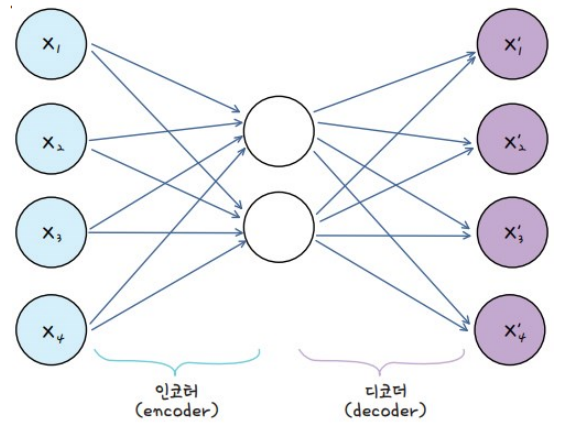

    - 입력한 이미지와 똑같은 크기로 출력층을 만든다.
    - 입력층보다 적은 수의 노드를 가진 은닉층을 중간에 넣어 차원을 줄인다
    - 이때 소실된 데이터를 복원하기 위해 학습을 시작하고, 이과정을 통해 입력 데이터릐 특징을 효율적으로 응축한 새로운 출력이 나오는 원리

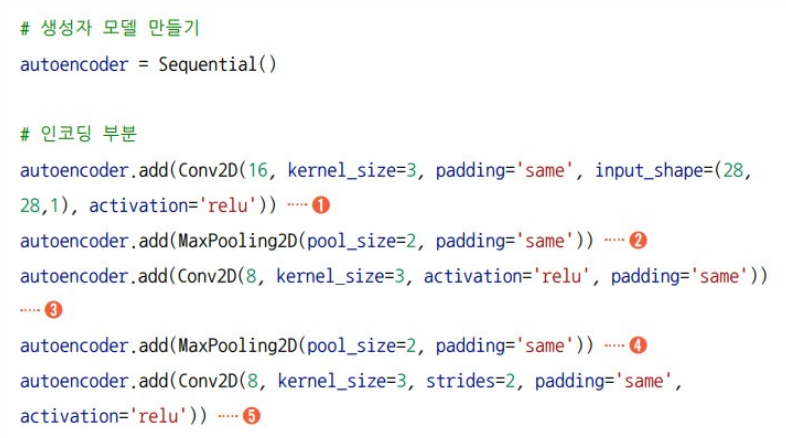
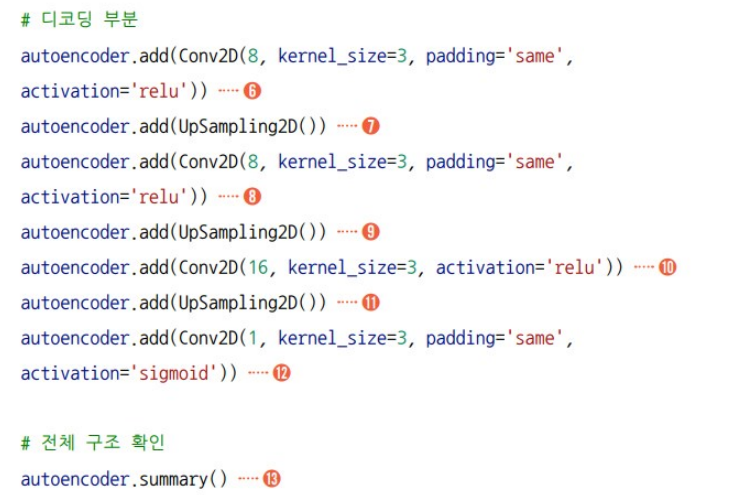

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [8]:
# MNIST 데이터셋을 불러옵니다.
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [9]:
# 생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분입니다.
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인합니다.
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 8)          

In [10]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 82s 171ms/step - loss: 0.2159 - val_loss: 0.1378
Epoch 2/50
469/469 [==============================] - 85s 182ms/step - loss: 0.1270 - val_loss: 0.1169
Epoch 3/50
469/469 [==============================] - 68s 144ms/step - loss: 0.1132 - val_loss: 0.1082
Epoch 4/50
469/469 [==============================] - 79s 168ms/step - loss: 0.1066 - val_loss: 0.1031
Epoch 5/50
469/469 [==============================] - 89s 189ms/step - loss: 0.1028 - val_loss: 0.1001
Epoch 6/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1000 - val_loss: 0.0977
Epoch 7/50
469/469 [==============================] - 75s 160ms/step - loss: 0.0980 - val_loss: 0.0960
Epoch 8/50
469/469 [==============================] - 74s 157ms/step - loss: 0.0963 - val_loss: 0.0942
Epoch 9/50
469/469 [==============================] - 74s 158ms/step - loss: 0.0949 - val_loss: 0.0929
Epoch 10/50
469/469 [==============================] - 75s 159ms/step - l

313/313 [==============================] - 5s 16ms/step


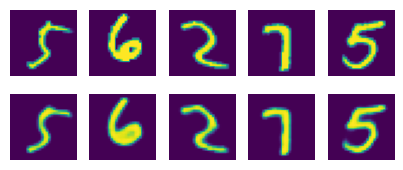

In [11]:
# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):        # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1)
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()